In [ ]:
import numpy as np
import math
import pandas as pd
import random
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
)

# Perceptron

In [ ]:
class Perceptron:
    weights: np.array
    bias: float
    learning_rate: float
    activation_function: str
    loss_function: str

    def fit(
        self,
        features: np.array,
        labels: np.array,
        learning_rate=0.0001,
        epochs=100,
        activation_function='binary',
        loss='mse',
        batch_size=None
    ):
        if loss not in ['gd', 'mse']:
            raise ValueError('Invalid Loss Function')

        self.loss_function = loss
        self.activation_function = activation_function
        self.learning_rate = learning_rate

        n_samples, n_features = features.shape

        if batch_size == None:
            batch_size = n_samples

        self.weights = np.array(
            [random.uniform(-1, 1) for _ in range(n_features)]
        )
        self.bias = 1

        itt = 0
        while itt < epochs:
            for m in range(math.ceil(n_samples/batch_size)):
                start = m * batch_size
                end = start + batch_size

                if end >= n_samples:
                    end = n_samples

                x_partial = features[start:end]
                weighted_sums = x_partial.dot(self.weights.T) + self.bias

                y_pred = self._activation_function(weighted_sums)

                errors = np.subtract(labels[start:end], y_pred)
                self._update_weights(x_partial, errors)

            itt += 1

    def _mse_update(self, x, errors):
        n_samples = len(errors)
        self.weights += (2 * self.learning_rate * (x.T).dot(errors)) / n_samples
        self.bias += (2 * self.learning_rate * np.sum(errors)) / n_samples

    def _gd_update(self, x, errors):
        self.weights += self.learning_rate * (x.T).dot(errors)
        self.bias += self.learning_rate * np.sum(errors)

    def _update_weights(self, x, errors):
        if self.loss_function == 'mse':
            self._mse_update(x, errors)
            return

        if self.loss_function == 'gd':
            self._gd_update(x, errors)
            return

    def _activation_function(self, weighted_sums):
        if self.activation_function == 'relu':
            return self._relu(weighted_sums, 0)

        if self.activation_function == 'l_relu':
            return self._relu(weighted_sums, 0.01)

        if self.activation_function == 'sigmoid':
            return self._sigmoid(weighted_sums)

        if self.activation_function == 'tanh':
            return self._tanh(weighted_sums)

        if self.activation_function == 'binary':
            return self._binary(weighted_sums)

        raise ValueError('Invalid Activation Function!')

    def _relu(self, weighted_sum, rate):
        output = np.where(weighted_sum < 0, rate*weighted_sum, weighted_sum)
        return output

    def _sigmoid(self, weighted_sum):
        output = 1 / (1 - np.power(math.e, weighted_sum))
        return output

    def _tanh(self, weighted_sum):
        return np.tanh(weighted_sum)

    def _binary(self, weighted_sum):
        return np.where(weighted_sum < 0.5, 0, 1)

    def predict(self, features: pd.DataFrame):
        weighted_sums = np.add(features.dot(self.weights.T), self.bias)
        y_pred = self._binary(self._activation_function(weighted_sums))

        return y_pred

    @property
    def get_weights(self):
        return self.weights

    @property
    def get_bias(self):
        return self.bias

# Tratamento de Dados

In [ ]:
dataset = load_iris()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df["target"] = dataset.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
df = df[["sepal length (cm)", "sepal width (cm)", "target"]]
df = df[df.target != 1]
df["target"] = df["target"].map({0: 0, 2: 1})
df

,sepal length (cm),sepal width (cm),target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,1
146,6.3,2.5,1
147,6.5,3.0,1
148,6.2,3.4,1


In [ ]:
df.columns = [text.replace(" ", "_").lstrip().rstrip() for text in df]
df

,sepal_length_(cm),sepal_width_(cm),target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,1
146,6.3,2.5,1
147,6.5,3.0,1
148,6.2,3.4,1


# Treinamento

In [ ]:
train_data, test_data = train_test_split(
    df, test_size=0.2, stratify=df["target"], random_state=25
)

x_train = np.array(train_data.drop(columns="target"))
y_train = np.array(train_data['target'])

In [ ]:
pct = Perceptron()
pct.fit(
    x_train, y_train,
    learning_rate=0.0005,
    epochs=5000,
    activation_function='relu',
    loss='mse',
    batch_size=1
)

In [ ]:
print(pct.get_weights,'X +', pct.get_bias)

[ 0.39587236 -0.57709871] X + 0.03480997530165987


In [ ]:
x_test = test_data.drop(columns="target")
y_test = test_data.drop(columns=["sepal_length_(cm)", "sepal_width_(cm)"])

y_pred = pct.predict(x_test)

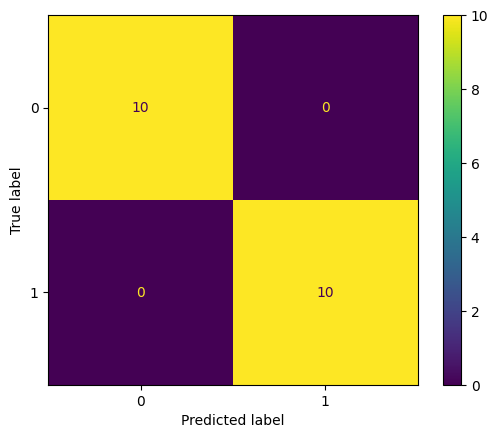

In [ ]:
cm = confusion_matrix(y_test.target, y_pred)
cm = ConfusionMatrixDisplay(cm)

cm.plot()
plt.show()

In [ ]:
print(classification_report(list(y_test.target), y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



# Limiar de Decisão

In [ ]:
x_min, x_max = x_test['sepal_length_(cm)'].min() - 0.5, x_test['sepal_length_(cm)'].max() + 0.5
y_min, y_max = x_test['sepal_width_(cm)'].min() - 0.5, x_test['sepal_width_(cm)'].max() + 0.5

step = 0.03

x, y = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
X = pd.DataFrame(data=np.c_[x.ravel(), y.ravel()])

z = np.array(pct.predict(X))
z = z.reshape(x.shape)

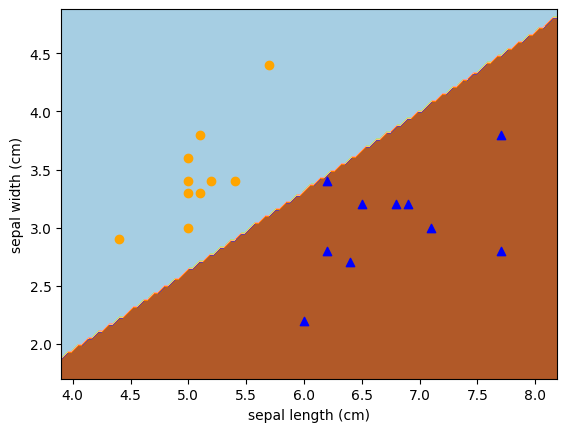

In [ ]:
plt.contourf(x, y, z, cmap=plt.cm.Paired)
plt.scatter(
    x_test[y_test.target == 0]['sepal_length_(cm)'],
    x_test[y_test.target == 0]['sepal_width_(cm)'],
    marker='o',
    color='orange'
)
plt.scatter(
    x_test[y_test.target == 1]['sepal_length_(cm)'],
    x_test[y_test.target == 1]['sepal_width_(cm)'],
    marker='^',
    color='blue'
)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()